# OpenCV

## import OpenCv

In [1]:
import cv2

In [2]:
# その他ライブラリインポート
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## cv2.imread()

In [3]:
# 画像ファイルをndarrayで読み込み (BGRで読み込み)
im = cv2.imread('lenna.png')

## plt.imshow()

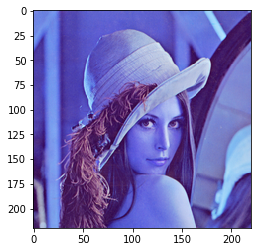

In [4]:
# ndarrayを画像として表示 (RGBで表示)
plt.imshow(im)

## cv2.cvtColor()

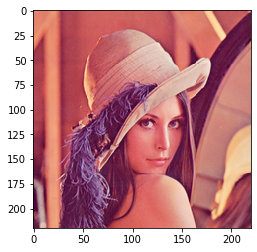

In [5]:
# BGR->RGB
rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

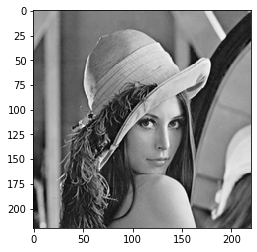

In [6]:
# 白黒　(gray scale)
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

## cv2.imwrite()

In [7]:
# read　(BGR)
im = cv2.imread('lenna.png')
# crop
im = im[50:-50, 50:-50, :]
# save (BGR)
cv2.imwrite('cropped_lenna.png', im)

True

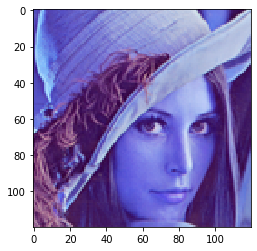

In [8]:
# read again (BGR)
cropped_im = cv2.imread('cropped_lenna.png')
plt.imshow(cropped_im)

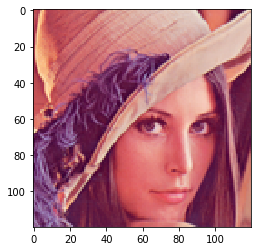

In [9]:
# RGBに変換して保存すると？？
cropped_im_rgb = cv2.cvtColor(cropped_im, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_im_rgb)

In [10]:
# save (BGR)
cv2.imwrite('cropped_lenna_rgb.png', cropped_im_rgb)

True

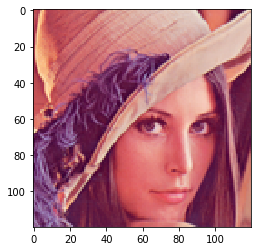

In [11]:
cropped_im_rgb_load = cv2.imread('cropped_lenna_rgb.png')
# チャネルが入れ替わるので注意
plt.imshow(cropped_im_rgb_load)

## Binarization
## cv2.threshold()

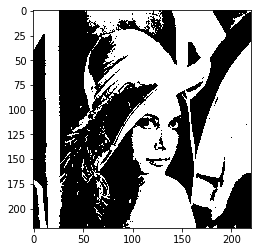

In [12]:
# 輝度値が127未満は0, それ以上は255
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [13]:
# 戻り値は ret=閾値, thresh=binary image
ret

127.0

In [14]:
thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

## Otsu's binarization

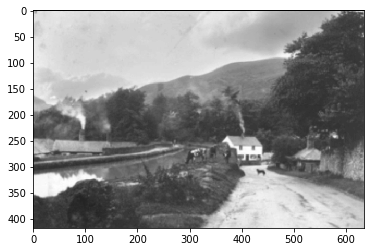

In [15]:
# 輝度値のヒストグラムがbimodalの時に有効．自動で最適な閾値を設定
im = cv2.imread('bimodal_sample.png')
# gray scale
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

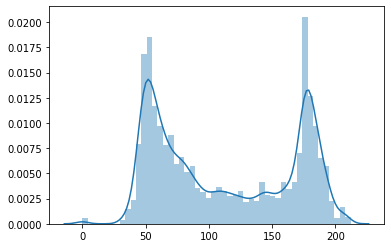

In [16]:
# 輝度値のヒストグラム
sns.distplot(gray.flatten())

In [17]:
# Otsu binarization
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

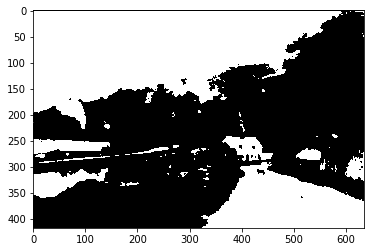

In [18]:
plt.imshow(thresh, cmap='gray')

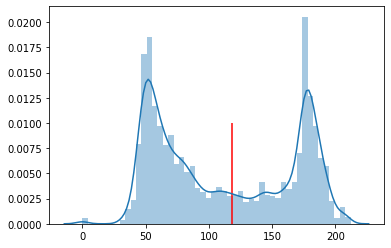

In [19]:
# ヒストグラムと閾値
sns.distplot(gray.flatten())
plt.vlines(ret, 0, 0.01, 'r')

## Adaptive Thresholding

In [20]:
im = cv2.imread('text_pic.jpg')

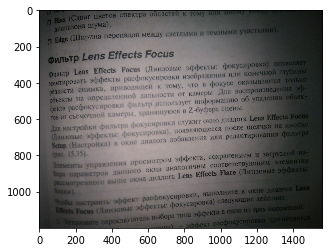

In [21]:
plt.imshow(im)
# gray scale
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

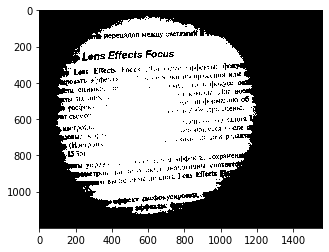

In [22]:
plt.imshow(thresh, cmap='gray')

In [23]:
# kernel(window)サイズは15x15, 
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,4)


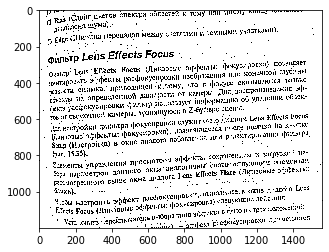

In [24]:
plt.imshow(thresh, cmap='gray')